1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
from scipy import stats
from scipy import integrate
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [5]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2023-11-30 14:11:04--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2023-11-30 14:11:05--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0039d8471e703edaaf21d7dc0c.dl.dropboxusercontent.com/cd/0/inline/CIhSenAMZoFHgVnJRnyQZiHcIlsojziT5ZLSWDCrYRAcaL5z7bH93wpwZZcpkBgfMXyYK8msxUpKtL1kPQVjA12UwnMgKNsNlqIIobejlaRNIq8WsZJNvzqWPKP-y46Dd9w/file# [following]
--2023-11-30 14:11:05--  https://uc0039d8471e703edaaf21d7dc0c.dl.dropboxusercontent.com/cd/0/inline/CIhSenAMZoFHgVnJRnyQZiHcIlsojziT5ZLSWDCrYRAcaL5z7bH93wpwZZcpkBgfMXyYK8msxUpKtL1kPQVjA12UwnMgKNsNlqIIobejlaRNIq8Ws

In [188]:
data = pd.read_csv("regression_generated.csv")

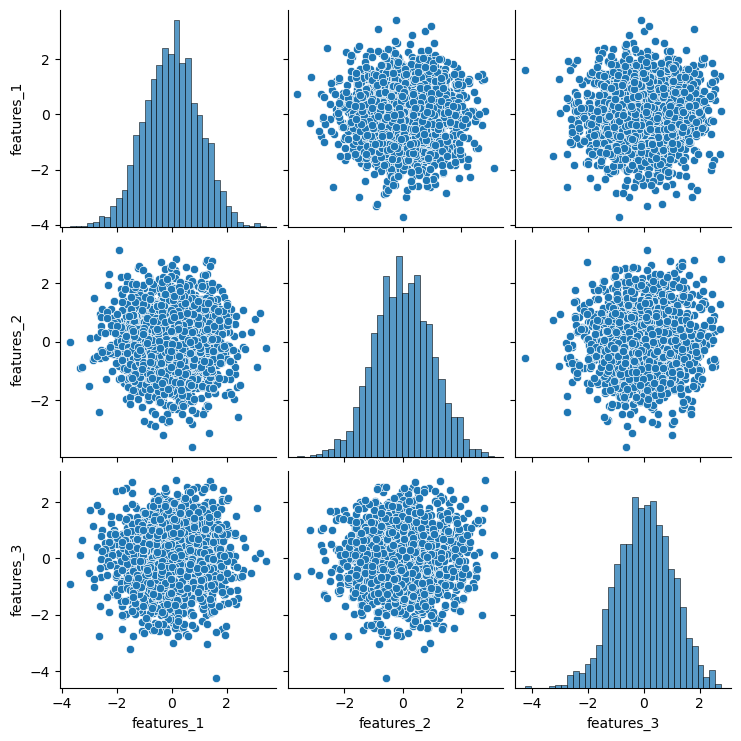

In [189]:
data_features = data.iloc[:,1:4]
sns.pairplot(data_features)

# We see no obvious correlation between any of the three features, as the data seems normally distributed, looking
# at the histograms, and also there seems to be no tendencies for correlation looking at the scatterplots, since all
# datapoint are evenly and randomly distributed around the middle, whereas correlation would have either a upgoing
# or downgoing slope. 

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

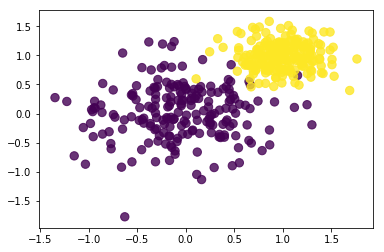

In [1]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

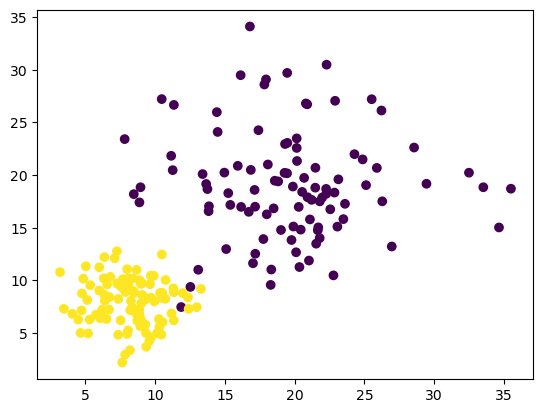

In [194]:
def func_generate_dataset(mean1, std1, mean2, std2):
    nrnf = np.random.normal(mean1, std1, size=(100,2))
    nrne = np.random.normal(mean2, std2, size=(100,2))
    
    label = np.concatenate([np.zeros(100), np.ones(100)])
    dataset = np.concatenate([nrnf, nrne])
    
    return dataset, label

mean1 = 20.
std1 = 5.
mean2 = 8.
std2 = 2.

dataset, label = func_generate_dataset(mean1,std1,mean2,std2)

plt.scatter(dataset[:,0], dataset[:,1], c = label)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [53]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-11-30 15:03:02--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-11-30 15:03:02--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1e9da97799f7a66332164f8575.dl.dropboxusercontent.com/cd/0/inline/CIivt1mfMgjKOXEb7vsyclPHQc9Jz-rPIsoHCSMNhfkvtp_47HQbLQYf0NAl-AEz8OQXL0QkoGZ3lqbJE-LDIpYqbBKkhArQCJs-d8e9ZpEDSLKg46ooZnhCOuyPbkKC15U/file# [following]
--2023-11-30 15:03:02--  https://uc1e9da97799f7a66332164f8575.dl.dropboxusercontent.com/cd/0/inline/CIivt1mfMgjKOXEb7vsyclPHQc9Jz-rPIsoHCSMNhfkvtp_47HQbLQYf0NAl-AEz8OQXL0QkoGZ3lqbJE-LDIpYqbBKkhArQCJs-d8e9ZpEDSLKg46ooZnhCOuyPbkKC15U/fi

In [48]:
file_path = 'data/residuals_261.pkl'
file = open(file_path, 'rb')
df = pickle.load(file)
file.close()

In [49]:
nested = df.item()

In [50]:
residuals = nested['residuals']
distances = nested['distances']

In [51]:
#Cleaning of data
residuals_cleaned = residuals[abs(residuals) < 2]
distances_cleaned = distances[abs(residuals) < 2]

Correlation coefficient: 0.04340351052255907
P-Value: None


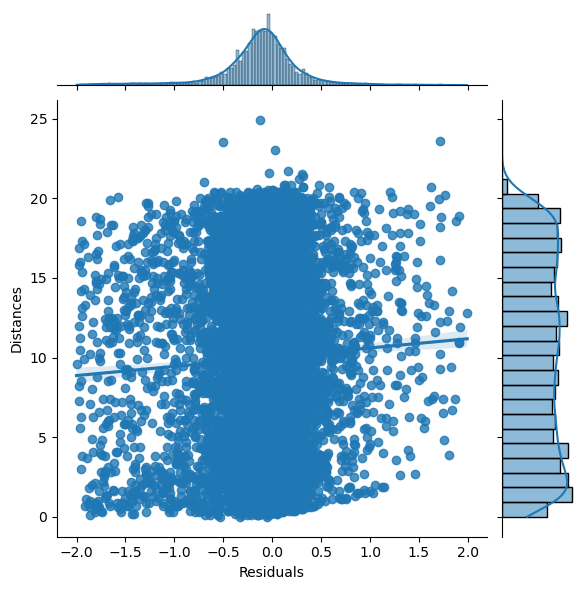

In [52]:
# Seaborn plot
plot_data = pd.DataFrame({'Residuals': residuals_cleaned, 'Distances': distances_cleaned})
g = sns.jointplot(x="Residuals", y="Distances", data=plot_data, kind="reg")

corr_coefficient = plot_data['Distances'].corr(plot_data['Residuals'])
p_value = g.ax_joint.get_lines()[0].get_gid()

# Print the correlation coefficient and p-value
print("Correlation coefficient:", corr_coefficient)
print("P-Value:", p_value)
## From this plot and the correlation coefficient we see no correlation between the "residuals" and "distances".
## The correlation can be analyzed, looking at the datapoints, if they were closely placed around the linear
## regression line in an either upwards or downwards line. On the other hand, if
## the datapoint were scattered around in a circular shape, no correlation between the two variables would be present. 
## The correlation coefficient also indicates no correlation, as it should be close to either 1 or 1 to indicate correlation. 

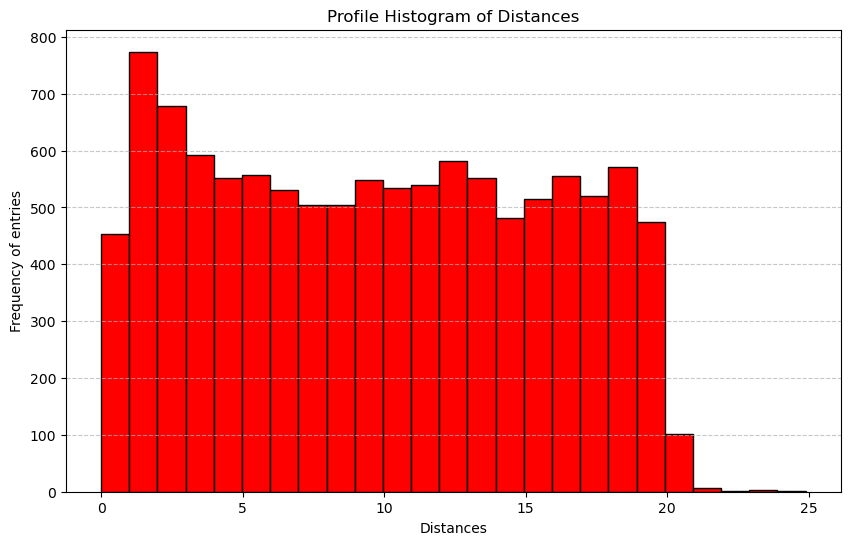

In [53]:
# Profile histogram for the "distance" variable
fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
h, x, _ = ax1.hist(distances, bins=25, color='red', edgecolor='black')

plt.xlabel('Distances')
plt.ylabel('Frequency of entries')
plt.title('Profile Histogram of Distances')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [54]:
print("This is the array x of bin centers for the profile histogram of the distance variable \n", x)

This is the array x of bin centers for the profile histogram of the distance variable 
 [ 0.     0.996  1.992  2.988  3.984  4.98   5.976  6.972  7.968  8.964
  9.96  10.956 11.952 12.948 13.944 14.94  15.936 16.932 17.928 18.924
 19.92  20.916 21.912 22.908 23.904 24.9  ]


In [55]:
plot_data['distance_bins'] = pd.cut(plot_data['Distances'], bins=x, include_lowest=True)
y = plot_data.groupby('distance_bins')['Residuals'].mean().values
print("This is the array y, the mean values of the residuals, estimated in bins of distance: \n", y)

This is the array y, the mean values of the residuals, estimated in bins of distance: 
 [-0.24725253 -0.13466177 -0.17574601 -0.16524753 -0.12789461 -0.13872711
 -0.1044014  -0.07883523 -0.10261885 -0.0908137  -0.03889467 -0.09757961
 -0.08597078 -0.13649716 -0.13911416 -0.13586924 -0.1405092  -0.15795732
 -0.12647329 -0.05846215  0.05865429  0.05111111         nan  0.41285714
 -0.12857143]


In [56]:
err_y = plot_data.groupby('distance_bins')['Residuals'].std().values
print("This is the array err_y, the standard deviation of the of the residuals, estimated in bins of distance: \n", err_y)

This is the array err_y, the standard deviation of the of the residuals, estimated in bins of distance: 
 [0.48576155 0.42803951 0.4250441  0.40964586 0.39026555 0.39313766
 0.4459799  0.45480609 0.4432416  0.40508698 0.43912157 0.47772005
 0.50759178 0.45687963 0.45216187 0.46115892 0.43144405 0.42638868
 0.40973978 0.37268904 0.49212221 0.38988127        nan 1.15402844
        nan]


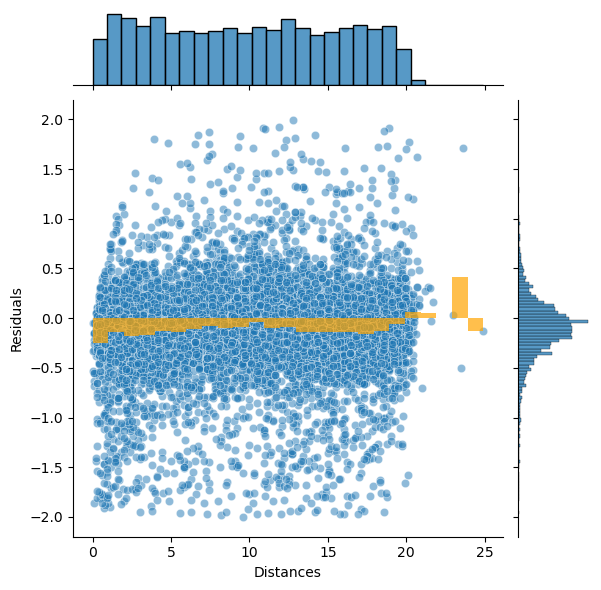

In [60]:
scatter = sns.jointplot(x='Distances', y='Residuals', data=plot_data, kind='scatter', alpha=0.5)
scatter.ax_joint.bar(x[:-1], y, width=np.diff(x), align='edge', alpha=0.7, color='orange')

plt.xlabel('Distances')
plt.ylabel('Residuals')

# Show the plot
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


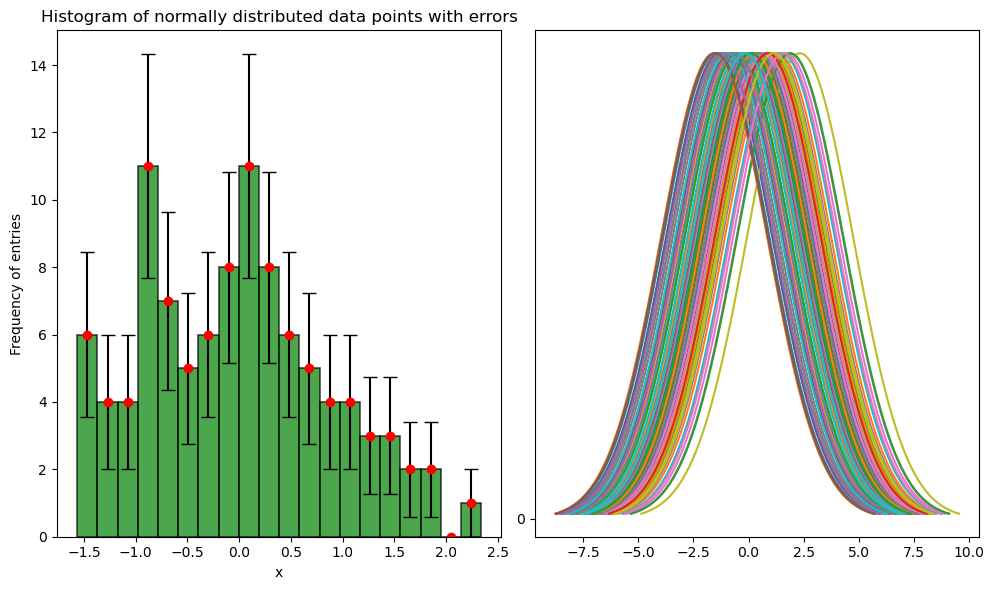

In [195]:
N = 100
x  = np.random.normal(0, 1, size=(N,))

std_gaus_func = lambda x: 1.06 * x.std() * x.size ** (1/5)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
h, bins, _ = ax1.hist(x, bins=20, alpha=0.7, color='green', edgecolor='black', linewidth=1.2)

errors = np.sqrt(h)

ax1.set_title('Histogram of normally distributed data points with errors')
ax1.set_xlabel('x')
ax1.set_ylabel('Frequency of entries')
plt.yticks(np.arange(0, max(h) + 5, step=1))

centers = 0.5 * (bins[:-1] + bins[1:])
ax1.errorbar(centers, h, yerr=errors, fmt='o', color='red', ecolor='black', capsize=5)


std_gaus = std_gaus_func(x)

gaus_sum = np.zeros(N)

for i in x:
    x_gaus = np.linspace(i - 3*std_gaus, i + 3*std_gaus, N)
    y_gaus = stats.norm.pdf(x_gaus, i, std_gaus)
    ax2.plot(x_gaus, y_gaus)
    
    gaus_sum += y_gaus

    
plt.tight_layout()
plt.show()

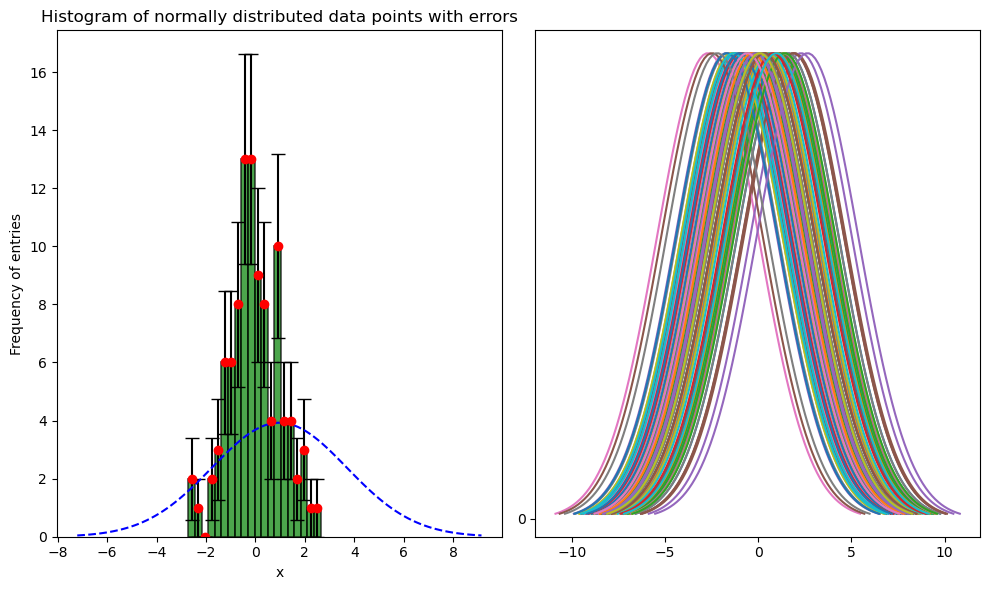

In [196]:
N = 100
x  = np.random.normal(0, 1, size=(N,))

std_gaus_func = lambda x: 1.06 * x.std() * x.size ** (1/5)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
h, bins, _ = ax1.hist(x, bins=20, alpha=0.7, color='green', edgecolor='black', linewidth=1.2)

errors = np.sqrt(h)

ax1.set_title('Histogram of normally distributed data points with errors')
ax1.set_xlabel('x')
ax1.set_ylabel('Frequency of entries')
plt.yticks(np.arange(0, max(h) + 5, step=1))

centers = 0.5 * (bins[:-1] + bins[1:])
ax1.errorbar(centers, h, yerr=errors, fmt='o', color='red', ecolor='black', capsize=5)


std_gaus = std_gaus_func(x)

gaus_sum = np.zeros(N)

for i in x:
    x_gaus = np.linspace(i - 3*std_gaus, i + 3*std_gaus, N)
    y_gaus = stats.norm.pdf(x_gaus, i, std_gaus)
    ax2.plot(x_gaus, y_gaus)
    
    gaus_sum += y_gaus

area_h = np.sum(np.diff(bins) * h)
area_gaussian_sum = integrate.trapz(gaus_sum, x_gaus)

final_sum = gaus_sum * (area_h / area_gaussian_sum)


ax1.plot(x_gaus, final_sum, color='blue', linestyle='--', label='Normalized Sum')

plt.tight_layout()
plt.show()
